# Index Funds with Mixed-Integer-Programming

We will analyze daily price data for stocks in the Dow Jones index and then try to build an accurate index fund using a small numbers of stocks therein.

Similar material was already used in a presentation at PyData Berlin 2017. See the ["Tour of popular packages" notebook](http://nbviewer.jupyter.org/github/daveh19/pydataberlin2017/blob/master/notebooks/02%20Tour%20of%20popular%20packages.ipynb). Back then, we worked with Julia 0.6 and used the packages `DataFrames`, `Plots` and `JuMP`. Now, we work with Julia 1.0 and use packages from the `Queryverse` and `IndexedTables` for data prep and visualization.

## Loading the Data

In [1]:
using Queryverse
using IndexedTables

In [2]:
;head dowjones2016.csv

date,symbol,price
2016-01-04,AAPL,105.349997999999999
2016-01-04,AXP,67.589995999999999
2016-01-04,BA,140.500000000000000
2016-01-04,CAT,67.989998000000000
2016-01-04,CSCO,26.410000000000000
2016-01-04,CVX,88.849997999999999
2016-01-04,DD,63.070000000000000
2016-01-04,DIS,102.980002999999996
2016-01-04,GE,30.709999000000000


In [3]:
load("dowjones2016.csv")

date,symbol,price
2016-01-04,"""AAPL""",105.35
2016-01-04,"""AXP""",67.59
2016-01-04,"""BA""",140.5
2016-01-04,"""CAT""",67.99
2016-01-04,"""CSCO""",26.41
2016-01-04,"""CVX""",88.85
2016-01-04,"""DD""",63.07
2016-01-04,"""DIS""",102.98
2016-01-04,"""GE""",30.71
2016-01-04,"""GS""",177.14


In [4]:
price = load("dowjones2016.csv") |> ndsparse

2-d NDSparse with 7560 values (1 field named tuples):
date        symbol │ price
───────────────────┼───────
2016-01-04  "AAPL" │ 105.35
2016-01-04  "AXP"  │ 67.59
2016-01-04  "BA"   │ 140.5
2016-01-04  "CAT"  │ 67.99
2016-01-04  "CSCO" │ 26.41
2016-01-04  "CVX"  │ 88.85
2016-01-04  "DD"   │ 63.07
2016-01-04  "DIS"  │ 102.98
2016-01-04  "GE"   │ 30.71
2016-01-04  "GS"   │ 177.14
2016-01-04  "HD"   │ 131.07
2016-01-04  "IBM"  │ 135.95
                   ⋮
2016-12-30  "MSFT" │ 62.14
2016-12-30  "NKE"  │ 50.83
2016-12-30  "PFE"  │ 32.48
2016-12-30  "PG"   │ 84.08
2016-12-30  "TRV"  │ 122.42
2016-12-30  "UNH"  │ 160.04
2016-12-30  "UTX"  │ 109.62
2016-12-30  "V"    │ 78.02
2016-12-30  "VZ"   │ 53.38
2016-12-30  "WMT"  │ 69.12
2016-12-30  "XOM"  │ 90.26

## Computing the Dow Jones Index

## Visualizing the data

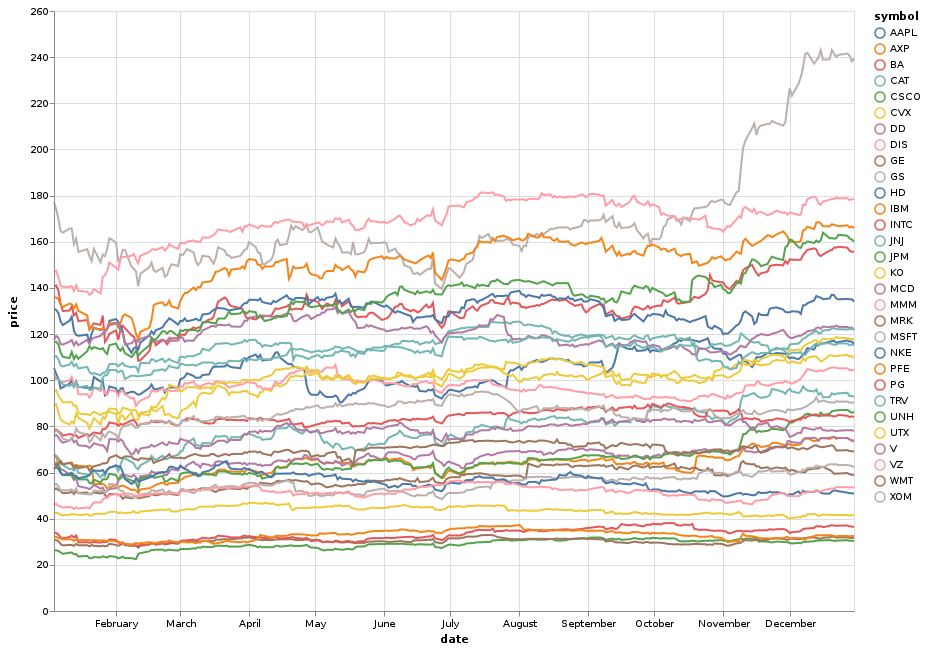

In [6]:
price |> @vlplot(:line, x=:date, y=:price, color=:symbol, width=800, height=600)